In [4]:
import rpy2.rinterface
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


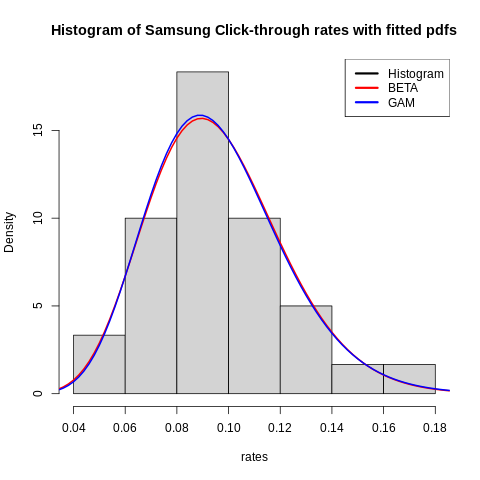

In [8]:
%%R

samsungdata <- read.table("samsung_ctr.txt", header = FALSE)
x <-samsungdata$V1
n <- length(x)
xbar <- mean(x)
xvar <- var(x)*((n-1)/n)

#beta distribution uses a and b
#mu1 is first moment, second moment is mu2
mu1 <- xbar
mu2 <- mean(x^2)
#6(a)
a.mm <- (mu1*(mu1-mu2))/(mu2-(mu1)^2)
b.mm <- ((1-mu1)*(mu1-mu2))/(mu2-(mu1)^2)


#gamma distribution in R uses (kappa, theta)
#6(b)
theta.mm <- (mu2 - (mu1)^2)/mu1
kappa.mm <- ((mu1)^2)/(mu2 - (mu1)^2)

#6(c)
#histogram
hist(x, freq = FALSE, main = "Histogram of Samsung Click-through rates with fitted pdfs", xlab = "rates")
curve(dbeta(x, shape1 = a.mm, shape2 = b.mm), from = 0, to = 0.2, col = "red", lwd = 2, add =TRUE)
curve(dgamma(x, shape = kappa.mm, scale = theta.mm), from = 0, to = 0.2, col = "blue", lwd = 2, add = TRUE)
legend("topright", legend = c("Histogram", "BETA", "GAM"), col = c("black", "red", "blue"), lwd = 3)

##Both distributions appear to model the data relatively well.
##Gamma has a slightly higher peak, so I probably would choose this one

#6(d)
#expected value of gamma: theta*kappa
ev.mm <- theta.mm*kappa.mm
##If looking at the Gamma model, Samsung should expect about 9.592%
#of users to click on the S8 ad